In [104]:
import geopandas as gpd
import matplotlib.pyplot as plt
import wbdata
import pandas as pd
import cartopy
%matplotlib inline
%store -r FHFAWB_df
path = 'c:/Users/silas/MIDS/jupyternotebooks/USAID/'
# world.plot(column='gdp_per_cap')
# world.plot(column='gdp_per_cap', cmap='OrRd')
# world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [111]:
# import a map of the world from 1994
world_1994 = gpd.read_file('{}CNTRY94.SHP'.format(path))
world_1994.columns = world_1994.columns.str.lower()
world_1994 = world_1994[(world_1994.name!="Antarctica")]

# select data for 1994
FHFAWB_1994 = FHFAWB_df[(FHFAWB_df.year == 1994)].reset_index(drop=True)
world_1994.rename(columns={'wb_cntry':'country_code', 'name':'country'}, inplace=True)
%store world_1994

# merge 1994 world and 1994 FHFAWB data
world_wbdata_1994 = world_1994.merge(FHFAWB_1994, how='left', on='country_code', suffixes=('r','l'))

Stored 'world_1994' (GeoDataFrame)


C:\Users\silas\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


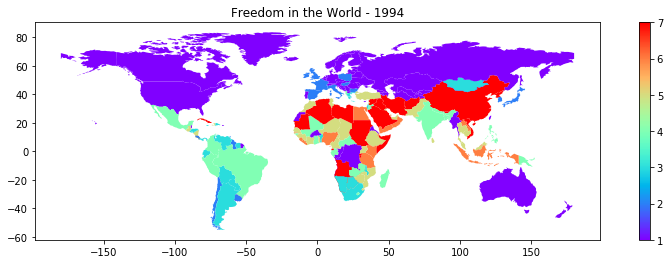

In [23]:
# plot 1994 map
world_wbdata_1994.plot(column='FH_value', figsize=(14,4), k=5, legend=True, cmap='rainbow')
plt.title('Freedom in the World - 1994')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., lable='GDP')

In [14]:
world_wbdata_1994[world_wbdata_1994.name == 'Russia']

,area,name,abbrevname,fips_code,country_code,geometry,country,year,FH_value,country_id,...,constant_pct_chg,date,gdppc,gini,nat,pop,voice,FH_diff,FH_pct_change,FH_pct_rolling5
168,6400657.079,Russia,Russia,RS,None,(POLYGON ((20.18120193481445 54.44091415405273...,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# import world 2016 shape file
world_2016 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world_2016['gdp_per_cap'] = round((world_2016.gdp_md_est / world_2016.pop_est)*1000000,2)
world_wbdata_2016 = world_2016.rename(columns={'iso_a3':'country_code','name':'country' })
%store world_wbdata_2016

# select data for 2016
FHFAWB_2016 = FHFAWB_df[FHFAWB_df.year == 2016]

# merge 2016 map and data
world_wbdata_2016 = world_wbdata_2016.merge(FHFAWB_2016, on='country')

Stored 'world_wbdata_2016' (GeoDataFrame)


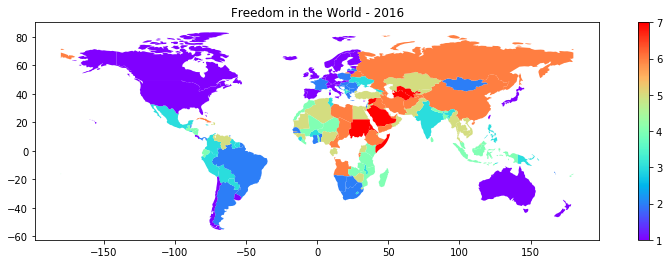

In [6]:
# plot 2016 world map
world_wbdata_2016.plot(column='FH_value', figsize=(14,4), k=5, legend=True, cmap='rainbow')
plt.title('Freedom in the World - 2016')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., lable='GDP')

In [ ]:
pd.DataFrame()

In [38]:
ind = list(range(len(FHFAWB_1994.country)))

In [25]:
world_1994.sort_values(by='country', inplace=True)

In [57]:
d = pd.Series(FHFAWB_1994.country).sort_values()

In [68]:
f = pd.DataFrame(world_1994.country)

In [69]:
f = f.reset_index(drop=True)

In [71]:
f['d'] = d

In [82]:
list(f.country)
    

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Byelarus',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Ka

In [90]:
[print(x) in list(f.country) for x in list(f.d) if x in list(f.d) == True]

[]

In [99]:
y=[]
for x in f.country:
    for i in FHFAWB_1994.country:
        if x == i:
            y.append(x)

In [107]:
%store f

Stored 'f' (DataFrame)


In [100]:
len(y)

147

In [98]:
len(set(f.country).intersection(FHFAWB_1994.country))

147

In [103]:
[x for x in FHFAWB_1994.country if x not in list(f.country)]

['Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Bosnia-Herzegovina',
 'Cape Verde',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Dominica',
 'Fiji',
 'Gambia',
 'Grenada',
 'Kiribati',
 'Liechtenstein',
 'Maldives',
 'Malta',
 'Marshall Islands',
 'Mauritius',
 'Micronesia',
 'Monaco',
 'Myanmar',
 'Nauru',
 'North Korea',
 'Palau',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Singapore',
 'Solomon Islands',
 'South Korea',
 'Tanzania',
 'Tonga',
 'Trinidad and Tobago',
 'Tuvalu',
 'Vanuatu',
 'Yugoslavia (Serbia and Montenegro)']